# Assignment 6


In [28]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

###Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

In [29]:
# Dataset is already loaded below
data = pd.read_csv("employee.csv")

In [30]:
# Dimensions of training data
data.shape

(4277, 13)

In [31]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [32]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [33]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [34]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [35]:
#Handling null values in categorical columns
data = data.dropna()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


###Data Visualization :

## Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [37]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [38]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [39]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [40]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(4261, 25)

In [41]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [42]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Train Test Split

In [43]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 24)
Validation Set Dimensions: (853, 24)


## Pre-processing data

### Standardization (Z-score normalization):

$$ x_{\text{std}} = \frac{x - \mu}{\sigma} $$

- **Purpose:** Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
- **Properties:**
  - Centers the data around 0.
  - Rescales the data to have unit variance.
  - Does not bound the data within a specific range.
  - Preserves the shape of the distribution.
- **Use Cases:**
  - Algorithms that assume zero-centered data or require features to have a similar scale (e.g., gradient descent-based algorithms, support vector machines).
  - When the distribution of the features is Gaussian-like.

### Normalization (Min-Max scaling):

 $$ x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)} $$

- **Purpose:** Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1].
- **Properties:**
  - Scales the data to a specified range.
  - Shifts the data to start at 0.
  - Does not affect the shape of the distribution.
  - Preserves the relative relationships between data points.
- **Use Cases:**
  - Neural networks, especially those with activation functions sensitive to input magnitudes (e.g., sigmoid or tanh functions).
  - When the distribution of the features is unknown or non-Gaussian.

**Choosing Between Standardization and Normalization:**
- Use standardization when the distribution of your features is approximately Gaussian-like and you want to center the data and rescale it to have unit variance.
- Use normalization when the scale of your features is important, or when you need to bound the features within a specific range.
- It's often beneficial to try both preprocessing techniques and evaluate their effects on model performance to determine which one works best for your specific dataset and model.


In [44]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [45]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [46]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
587,-0.253462,0,-0.491581,-0.630066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1738,1.238409,0,-0.491581,-0.028591,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1088,0.243828,1,-0.491581,2.377308,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3853,-1.248042,0,2.326128,0.572884,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1289,-0.253462,0,-0.491581,-0.630066,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.188963,0,-0.293853,-0.630066,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4259,0.282313,1,-0.353513,0.572884,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4209,-0.026473,0,0.012276,-0.630066,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4135,-1.248042,0,2.326128,-0.630066,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
#Fitting a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
reg.coef_

array([ 1.86601189e+02,  7.19533299e+01,  2.00386001e+02,  2.32848596e+02,
        8.30626138e+01, -4.42821487e+00,  1.16138819e+02, -2.19790088e+03,
        1.12830284e+03,  8.47730343e+02,  7.54135354e+02,  5.19026179e+02,
        1.04068287e+03,  7.92616395e+02, -8.77003286e+01,  9.71057702e+02,
       -1.36424205e-12,  3.55225587e+03,  2.81989154e+02, -3.62507328e+01,
        1.31342361e+02,  2.49853877e+02, -4.44000530e+02, -1.82513731e+02])

In [49]:
reg.intercept_

6212.121513935754

Just to recall

$\hat{y} = \alpha + \beta_1 * X_1 + \beta_2 * X_2 +...$

Our Final model is given by -

$\hat{y} = 6145.79 + 1.887 * X_1 + 7.22 * X_2 +...$


In [50]:
# Normalized MSE (Dividing by mean)
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)

209.6152657303852

In [51]:
# Predict on the test data
y_pred = reg.predict(X_test)

In [52]:
#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 12162.679090548452


*A lower MSE indicates that the model's predictions are closer to the actual values on average, while a higher MSE suggests larger errors between predictions and actual values.
❗Pre-processing on Test data not done.

In [53]:
#Q1. Preprocess Test data and get predictions

In [54]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming your data is split into `X_test` and `y_test` from the previous steps

# Preprocessing Test Data
# Apply the same scaling on the test data as was done on the training data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])  # Use the scaler fitted on the training set
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Predict on the test data
y_pred = reg.predict(X_test)

# Evaluate the model on test data
mse = mean_squared_error(y_test, y_pred) / np.mean(y_test)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 12162.679090548454


In [62]:
# Load the test data
test_data = data.copy()  # Assuming test data has a similar structure as training data

# Drop unnecessary columns (only if they exist)
columns_to_drop = ['id', 'timestamp', 'country']
test_data = test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns])

# Replace NaNs in numeric columns
test_data['hours_per_week'].fillna(test_data['hours_per_week'].median(), inplace=True)
test_data['telecommute_days_per_week'].fillna(test_data['telecommute_days_per_week'].median(), inplace=True)

# Drop rows with any remaining missing values
test_data = test_data.dropna()

# Encoding categorical and binary columns for test data
for col in binary_cols:
    test_data[col] = test_data[col].replace(to_replace=['Yes'], value=1)
    test_data[col] = test_data[col].replace(to_replace=['No'], value=0)

test_data = pd.get_dummies(test_data, columns=cat_cols, drop_first=True, dtype=int)

# Scale numeric features in the test set
test_data[num_cols] = scaler.transform(test_data[num_cols])  # Using the scaler fitted on the training data

# Ensure test data columns match the training data by adding any missing columns with zeros
for col in X_train.columns:
    if col not in test_data:
        test_data[col] = 0
test_data = test_data[X_train.columns]  # Align columns order with X_train

# Predict using the trained model
test_predictions = reg.predict(test_data)
test_predictions

array([15810.7035577 , 17272.01622647, 15293.78431267, ...,
       15961.58281702, 16458.82258051, 16640.54102157])

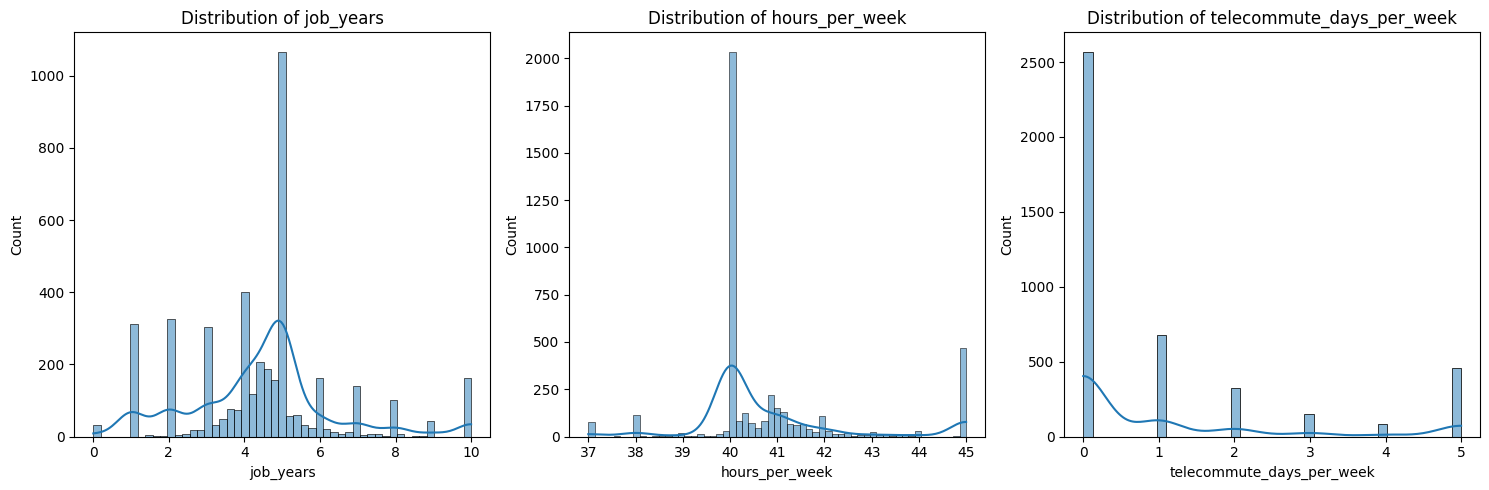

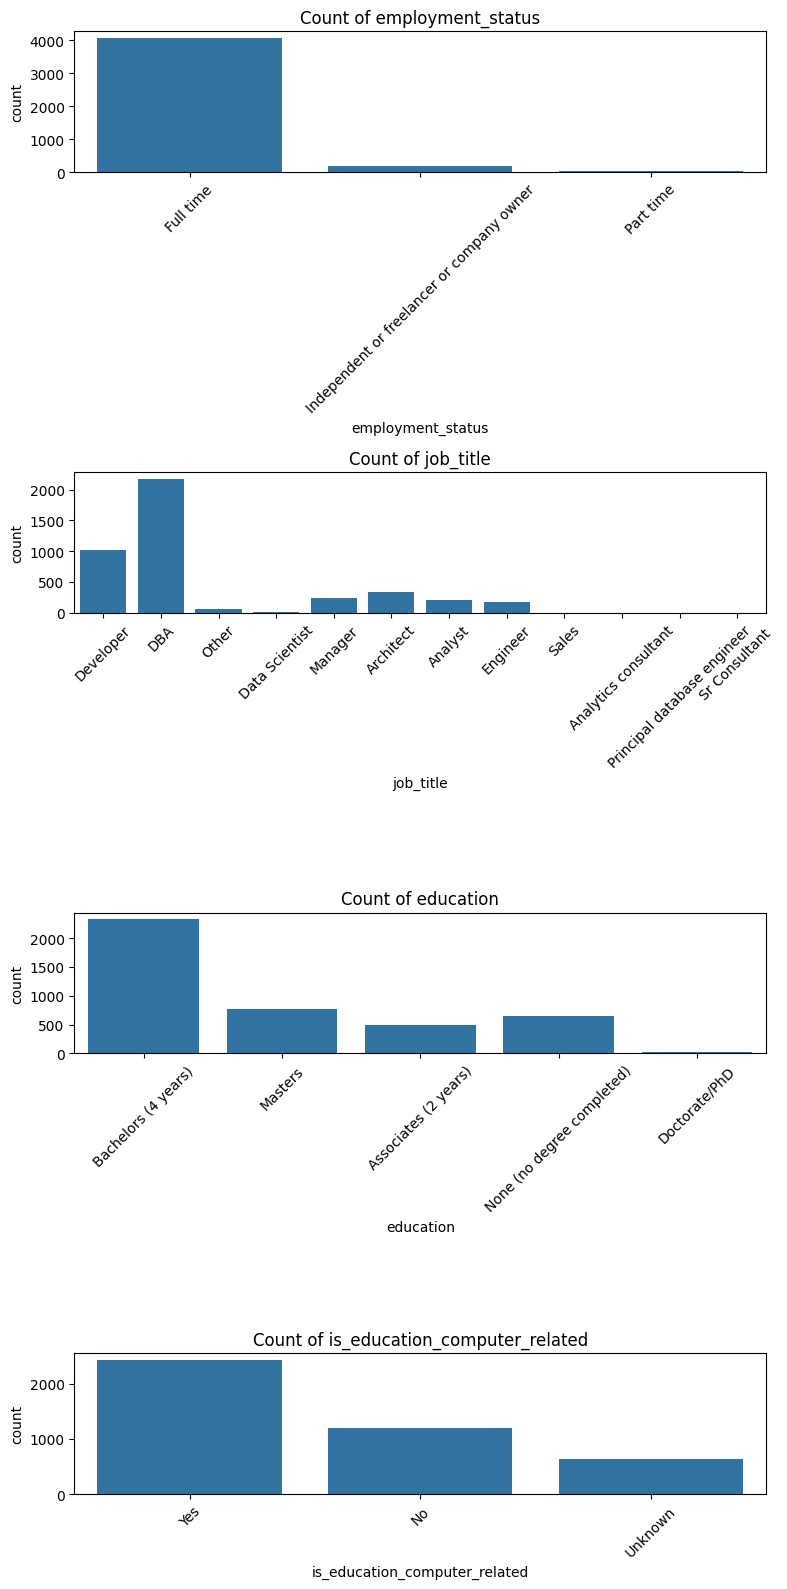

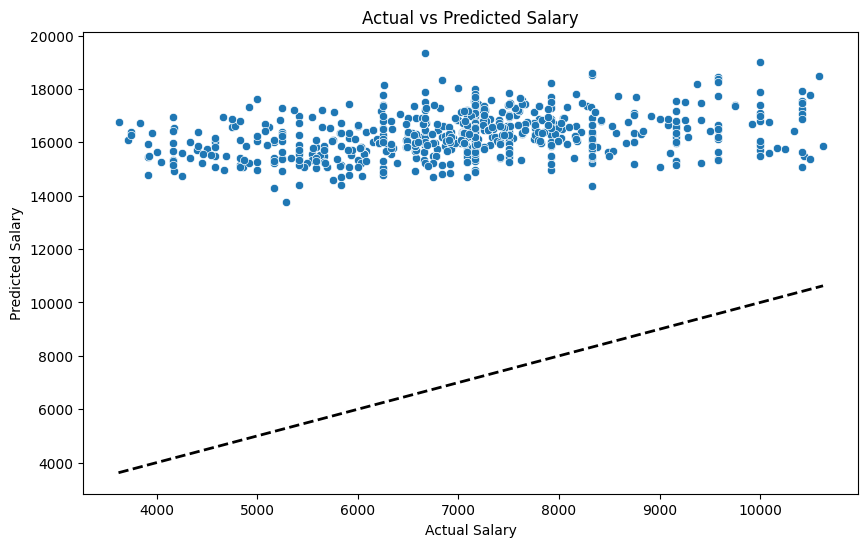

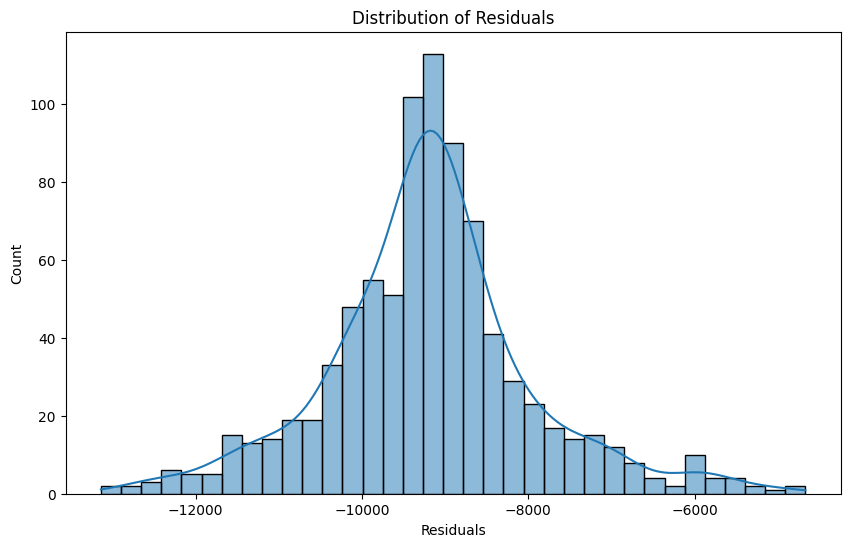

In [63]:
# 1. Distribution of numeric features
numeric_features = ['job_years', 'hours_per_week', 'telecommute_days_per_week']
fig, axes = plt.subplots(1, len(numeric_features), figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# 2. Categorical Features Count Plot
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(8, len(cat_cols) * 4))

for i, feature in enumerate(cat_cols):
    sns.countplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Actual vs. Predicted Salaries (Model Performance)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# 4. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
